### Import the libraries

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10

### Load the dataset

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

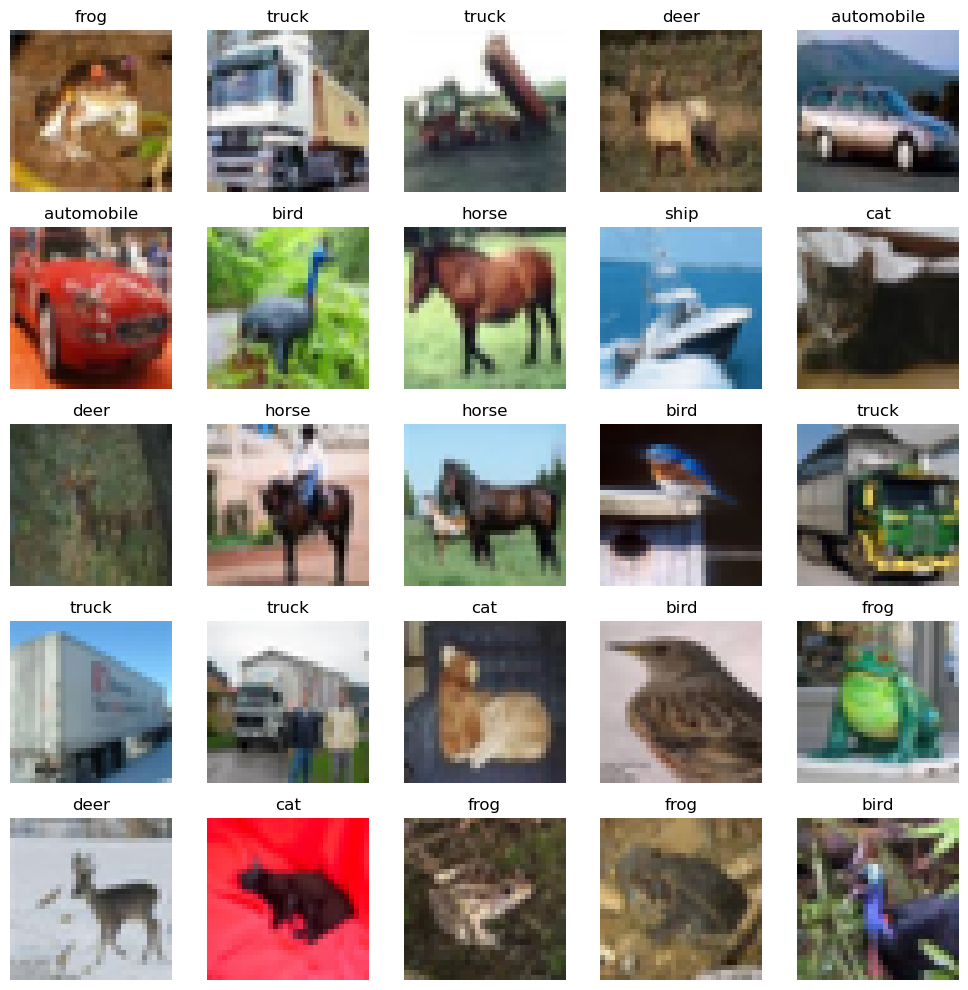

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
    plt.title(labels[y_train[i][0]])
plt.tight_layout();

### Scale the data

In [14]:
x_train = x_train / 255
x_test = x_test / 255

### Build the model

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)             

### Compile the model

In [20]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',  # as our target data is not changed into categorical that's why we took sparse
              metrics=['accuracy'])                      # if we convert target data using to_categorical then use categorical_crossentropy

### Train the model

In [21]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


5000/5000 [==============================] - 35s 7ms/step - loss: 1.4351 - accuracy: 0.4811
Epoch 2/10
5000/5000 [==============================] - 33s 7ms/step - loss: 1.0880 - accuracy: 0.6155
Epoch 3/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.9423 - accuracy: 0.6664
Epoch 4/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.8411 - accuracy: 0.7040
Epoch 5/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.7588 - accuracy: 0.7337
Epoch 6/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.6924 - accuracy: 0.7553
Epoch 7/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.6282 - accuracy: 0.7772
Epoch 8/10
5000/5000 [==============================] - 34s 7ms/step - loss: 0.5789 - accuracy: 0.7955
Epoch 9/10
5000/5000 [==============================] - 33s 7ms/step - loss: 0.5305 - accuracy: 0.8131
Epoch 10/10
5000/5000 [==============================] - 33s 7ms/step -

## On New Images

1/1 [==============================] - 0s 31ms/step


'airplane'

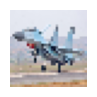

In [29]:
image1 = cv2.imread('airplane.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image1 = cv2.resize(image1, (32,32))
image1 = image1/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image1)

image1 = image1.reshape(1, 32, 32, 3)
labels[model.predict(image1).argmax()]

1/1 [==============================] - 0s 51ms/step


'automobile'

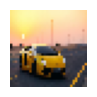

In [30]:
image2 = cv2.imread('automobile.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image2 = cv2.resize(image2, (32,32))
image2 = image2/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image2)

image2 = image2.reshape(1, 32, 32, 3)
labels[model.predict(image2).argmax()]

1/1 [==============================] - 0s 54ms/step


'truck'

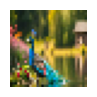

In [33]:
image3 = cv2.imread('bird.png')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

image3 = cv2.resize(image3, (32,32))
image3 = image3/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image3)

image3 = image3.reshape(1, 32, 32, 3)
labels[model.predict(image3).argmax()]

1/1 [==============================] - 0s 38ms/step


'dog'

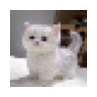

In [34]:
image4 = cv2.imread('cat.png')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

image4 = cv2.resize(image4, (32,32))
image4 = image4/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image4)

image4 = image4.reshape(1, 32, 32, 3)
labels[model.predict(image4).argmax()]

1/1 [==============================] - 0s 64ms/step


'deer'

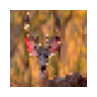

In [35]:
image5 = cv2.imread('deer.png')
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

image5 = cv2.resize(image5, (32,32))
image5 = image5/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image5)

image5 = image5.reshape(1, 32, 32, 3)
labels[model.predict(image5).argmax()]

1/1 [==============================] - 0s 65ms/step


'deer'

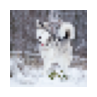

In [36]:
image6 = cv2.imread('dog.png')
image6 = cv2.cvtColor(image6, cv2.COLOR_BGR2RGB)

image6 = cv2.resize(image6, (32,32))
image6 = image6/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image6)

image6 = image6.reshape(1, 32, 32, 3)
labels[model.predict(image6).argmax()]

1/1 [==============================] - 0s 69ms/step


'frog'

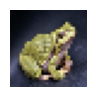

In [37]:
image7 = cv2.imread('frog.png')
image7 = cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)

image7 = cv2.resize(image7, (32,32))
image7 = image7/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image7)

image7 = image7.reshape(1, 32, 32, 3)
labels[model.predict(image7).argmax()]

1/1 [==============================] - 0s 45ms/step


'horse'

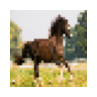

In [38]:
image8 = cv2.imread('horse.png')
image8 = cv2.cvtColor(image8, cv2.COLOR_BGR2RGB)

image8 = cv2.resize(image8, (32,32))
image8 = image8/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image8)

image8 = image8.reshape(1, 32, 32, 3)
labels[model.predict(image8).argmax()]

1/1 [==============================] - 0s 35ms/step


'ship'

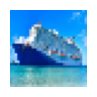

In [40]:
image9 = cv2.imread('ship.png')
image9 = cv2.cvtColor(image9, cv2.COLOR_BGR2RGB)

image9 = cv2.resize(image9, (32,32))
image9 = image9/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image9)

image9 = image9.reshape(1, 32, 32, 3)
labels[model.predict(image9).argmax()]

1/1 [==============================] - 1s 628ms/step


'truck'

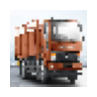

In [41]:
image10 = cv2.imread('truck.png')
image10 = cv2.cvtColor(image10, cv2.COLOR_BGR2RGB)

image10 = cv2.resize(image10, (32,32))
image10 = image10/255

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(image10)

image10 = image10.reshape(1, 32, 32, 3)
labels[model.predict(image10).argmax()]